## Basic analysis of MTurk Experiments

In [15]:
# import
import json
import numpy as np
import pandas as pd
from util import filters
from datetime import datetime
from util.filters import FORMAT, LIKERT_CONVERTER, CONDITIONS

from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
file = "pilot_09_10_final.json"
with open("./prolific_logs/" + file) as f:
    logs = json.load(f)
logs = [logs["logs"][l] for l in logs["logs"]]

In [17]:
df = pd.read_csv("scored_data_v2.csv")

In [18]:
# COMPLETED CHAT
COMPLETED_CHAT = [
    '0a805070',
    '0ca07eae',
    '1fedce0b',
    '25f91beb',
    '29d1fbab',
    '31ef1437',
    '3f0efa64',
    '4eec345c',
    '64ce8de6',
    '8b49d5c9',
    '8b9d5c77',
    'a29c7903',
    'b9bcb505',
    'c0da7f90',
    'c69eb698',
    'cf1d00f8',
    'cf44525f',
    'e551aa0d',
    'ede3330d',
    'f9c3adbb',
    '07e067f1',
    '1752b88d',
    '1d592874',
    '376a5899',
    '384677e6',
    '42f81d8b',
    '4766e928',
    '565d92b0',
    '5d9b81e0',
    '65beeb52',
    '68e019b0',
    '8f3d4494',
    'a5963840',
    'a955ec8d',
    'cbfc7b97',
    'de6a4316',
    '037ef383',
    '118d9807',
    '16a33519',
    '2e83a5c0',
    '31024d4f',
    '4cfd407b',
    '63900a6d',
    '68c38a81',
    '6b624cca',
    '6cc11957',
    '72ac16a0',
    '976467b3',
    '991508b7',
    'b58ac506',
    'bf6f2bf9',
    'cb2aec8c',
    'cd395f65',
    'e8749e69',
    'e87b34a5',
    '03b019f5',
    '1d3c5ef8',
    '1de97d07',
    '20e2e41a',
    '302ad47c',
    '4a9770ff',
    '5722ca70',
    '750d7a0e',
    '98f259f1',
    'aee66a6d',
    'b849f449',
    'bb00a8a0',
    'bcde45cb',
    'cbcb5e82',
    'd611a8d0',
    'd79f7e95',
    'dc335686',
    'f56852a3'
]

def completed_chat(log):
    return log["uuid"][:8] in COMPLETED_CHAT

# load data
file = "pilot_09_06.json"
with open("./prolific_logs/" + file) as f:
    logs = json.load(f)
logs = [logs["logs"][l] for l in logs["logs"]]

In [19]:
# helper function
def get_avg_std_err(vals):
    mean = np.mean(vals)
    std_dev = np.std(vals, ddof=1)  # Using ddof=1 for sample standard deviation
    
    # Calculate the standard error using the formula: standard deviation / sqrt(sample size)
    standard_error = std_dev / np.sqrt(len(vals))
    return mean, standard_error

#### Initial filters

In [20]:
# only consider completed sessions
print("Before filtering")
print("all logs:", len(logs))
for c in CONDITIONS:
    print(c, len([l for l in logs if l["condition"] == c]))


logs = [l for l in logs if l["completedSurvey"] == True]

print("\nAfter filtering")
print("completed logs:", len(logs))
for c in CONDITIONS:
    print(c, len([l for l in logs if l["condition"] == c]))

Before filtering
all logs: 166
reading 41
teacher-qa-bot 42
llm-qa-bot 41
llm-chatbot 42

After filtering
completed logs: 100
reading 19
teacher-qa-bot 29
llm-qa-bot 21
llm-chatbot 31


In [21]:
# NOTE: Filter sequence  | ADJUST AS DESIRED
print("n logs before filter:", len(logs))
for c in CONDITIONS:
    print(c, len([l for l in logs if l["condition"] == c]))

logs = [l for l in logs if filters.got_subject_right(l)]
logs = [l for l in logs if filters.got_device_right(l)]
logs = [l for l in logs if filters.got_valid_degree(l)]
logs = [l for l in logs if filters.did_not_cheat(l)]
logs = [l for l in logs if filters.no_tab_switch_during_exam(l)]

print("\nn logs after filter:", len(logs))
for c in CONDITIONS:
    print(c, len([l for l in logs if l["condition"] == c]))

#logs = [l for l in logs if completed_chat(l)]
#print("\nn logs after filter:", len(logs))

n logs before filter: 100
reading 19
teacher-qa-bot 29
llm-qa-bot 21
llm-chatbot 31

n logs after filter: 54
reading 11
teacher-qa-bot 14
llm-qa-bot 10
llm-chatbot 19


<span>Q1: I already knew most of this material before the session.</span>
Overall average:  2.37  ± 0.23

reading average:  2.27  ± 0.47
teacher-qa-bot average:  2.71  ± 0.5
llm-qa-bot average:  2.0  ± 0.39
llm-chatbot average:  2.37  ± 0.43
ANOVA p-value: 0.783

Broferroni correction
reading vs teacher-qa-bot p-value: 0.533
reading vs llm-qa-bot p-value: 0.665
reading vs llm-chatbot p-value: 0.887
teacher-qa-bot vs llm-qa-bot p-value: 0.303
teacher-qa-bot vs llm-chatbot p-value: 0.601
llm-qa-bot vs llm-chatbot p-value: 0.58

<span>Q2: It was difficult to learn this lesson.</span>
Overall average:  5.17  ± 0.27

reading average:  5.64  ± 0.59
teacher-qa-bot average:  4.71  ± 0.6
llm-qa-bot average:  5.7  ± 0.4
llm-chatbot average:  4.95  ± 0.5
ANOVA p-value: 0.534

Broferroni correction
reading vs teacher-qa-bot p-value: 0.292
reading vs llm-qa-bot p-value: 0.931
reading vs llm-chatbot p-value: 0.398
teacher-qa-bot vs llm-qa-bot p-value: 0.222
teacher-qa-bot vs llm-chatbot p-value: 0.7

/Users/mengxia/Library/Python/3.9/lib/python/site-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))
/var/folders/ny/25mz3ct16w751mqzz3zgblsw0000gn/T/ipykernel_25343/3525243984.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i - 1].set_yticklabels([ "Reading", "Teacher-QA-Bot", "LLM-QA-Bot", "LLM-Chatbot"])


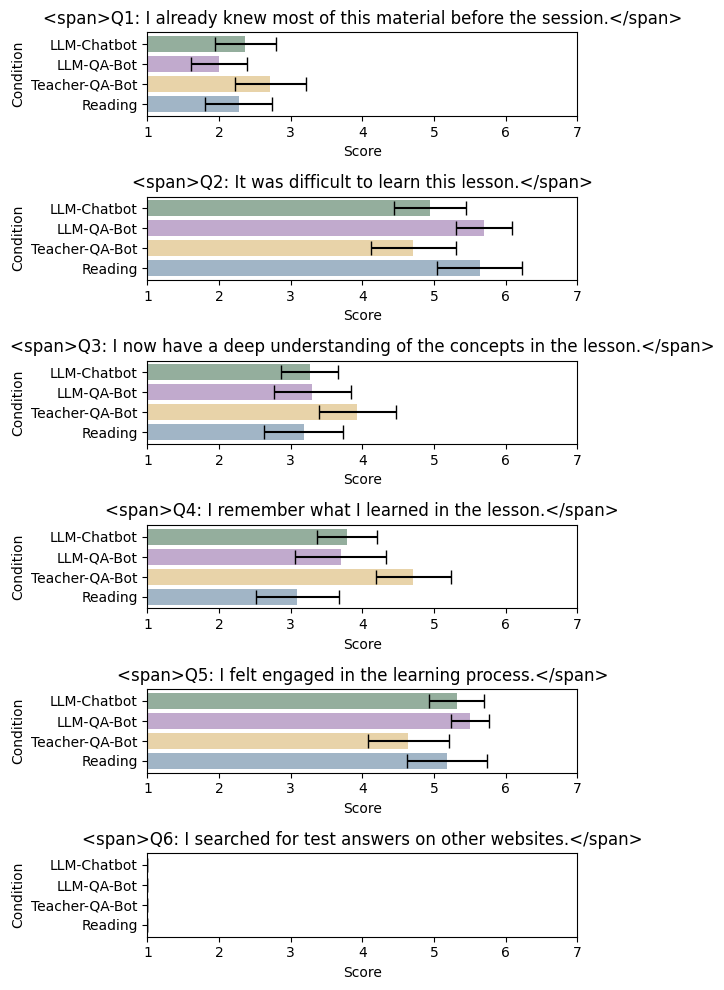

In [22]:
# First 6 UX questions
colors = ['#A1B5C6', '#E8D3A9', '#C1AACD', '#94AE9D']


def ux_score(log, index):
    answer = log["surveyAnswers"]["q" + str(index)]["answer"]
    return LIKERT_CONVERTER[answer]

all_scores = []
for i in range(1, 7):
    print(logs[0]["surveyAnswers"]["q" + str(i)]["question"])

    mean, err = get_avg_std_err([ux_score(l, i) for l in logs])
    print("Overall average:  " + str(round(mean, 2)) + "  ± " + str(round(err, 2)))
    print("")
    group_scores = []
    for c in CONDITIONS:
        group = [l for l in logs if l["condition"] == c]
        group_scores.append([ux_score(l, i) for l in group])
        mean, err = get_avg_std_err(group_scores[-1])
        print(c + " average:  " + str(round(mean, 2)) + "  ± " + str(round(err, 2)))
    all_scores.append(group_scores)
    _, p_value = f_oneway(*group_scores)
    print("ANOVA p-value:", round(p_value, 3))

    print("")
    # performe Broferroni correction
    print("Broferroni correction")
    for i in range(len(group_scores)):
        for j in range(i + 1, len(group_scores)):
            _, p_value = f_oneway(group_scores[i], group_scores[j])
            print(CONDITIONS[i] + " vs " + CONDITIONS[j] + " p-value:", round(p_value, 3))
    print("")
    
# plot a horizontal bar chart for each question as a subplot and within each subplot, there are 4 bars for 4 conditions, each condion has a mean and std and using a different color

fig, axs = plt.subplots(6, 1, figsize=(6, 10))
for i in range(1, 7):
    # axs[i - 1].set_title("Question " + str(i))
    axs[i - 1].set_title(logs[0]["surveyAnswers"]["q" + str(i)]["question"])
    axs[i - 1].set_ylabel("Condition")
    axs[i - 1].set_xlabel("Score")
    axs[i - 1].set_xlim(1, 7)
    axs[i - 1].set_xticks([1, 2, 3, 4, 5, 6, 7])
    axs[i - 1].set_xticklabels(["1", "2", "3", "4", "5", "6", "7"])
    axs[i - 1].set_yticklabels([ "Reading", "Teacher-QA-Bot", "LLM-QA-Bot", "LLM-Chatbot"])
    axs[i - 1].barh(["Reading", "Teacher-QA-Bot", "LLM-QA-Bot", "LLM-Chatbot"], [np.mean(s) for s in  all_scores[i-1]], xerr=[np.std(s, ddof=1) / np.sqrt(len(s)) for s in all_scores[i-1]], capsize=5, color=colors)
plt.tight_layout()
plt.show()


In [23]:
# chatbot qs
# handle q8 n/a

all_scores = []
for i in range(7, 15):
    if i == 8:
        continue
    group_scores = []
    print("question", i)
    for c in ['teacher-qa-bot', 'llm-qa-bot', 'llm-chatbot']:
        group = [l for l in logs if l["condition"] == c]
        group_scores.append([ux_score(l, i) for l in group])
        mean, err = get_avg_std_err(group_scores[-1])
        print(c + " average:  " + str(round(mean, 2)) + "  ± " + str(round(err, 2)))
    all_scores.append(group_scores)
    _, p_value = f_oneway(*group_scores)
    print("ANOVA p-value:", round(p_value, 3))
    print("")

    COND = ['teacher-qa-bot', 'llm-qa-bot', 'llm-chatbot']
    # performe Broferroni correction
    print("Broferroni correction")
    for i in range(len(group_scores)):
        for j in range(i + 1, len(group_scores)):
            _, p_value = f_oneway(group_scores[i], group_scores[j])
            print(COND[i] + " vs " + COND[j] + " p-value:", round(p_value, 3))
    print("")

question 7
teacher-qa-bot average:  3.36  ± 0.61
llm-qa-bot average:  3.6  ± 0.75
llm-chatbot average:  3.79  ± 0.52
ANOVA p-value: 0.866

Broferroni correction
teacher-qa-bot vs llm-qa-bot p-value: 0.802
teacher-qa-bot vs llm-chatbot p-value: 0.591
llm-qa-bot vs llm-chatbot p-value: 0.834

question 9
teacher-qa-bot average:  4.21  ± 0.5
llm-qa-bot average:  3.8  ± 0.55
llm-chatbot average:  4.37  ± 0.46
ANOVA p-value: 0.749

Broferroni correction
teacher-qa-bot vs llm-qa-bot p-value: 0.591
teacher-qa-bot vs llm-chatbot p-value: 0.825
llm-qa-bot vs llm-chatbot p-value: 0.456

question 10
teacher-qa-bot average:  4.36  ± 0.5
llm-qa-bot average:  3.6  ± 0.69
llm-chatbot average:  4.11  ± 0.43
ANOVA p-value: 0.639

Broferroni correction
teacher-qa-bot vs llm-qa-bot p-value: 0.369
teacher-qa-bot vs llm-chatbot p-value: 0.703
llm-qa-bot vs llm-chatbot p-value: 0.516

question 11
teacher-qa-bot average:  4.21  ± 0.49
llm-qa-bot average:  4.0  ± 0.6
llm-chatbot average:  4.21  ± 0.46
ANOVA p-

/var/folders/ny/25mz3ct16w751mqzz3zgblsw0000gn/T/ipykernel_25343/2635181436.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i - 1].set_yticklabels(["Teacher-QA-Bot", "LLM-QA-Bot", "LLM-Chatbot"])


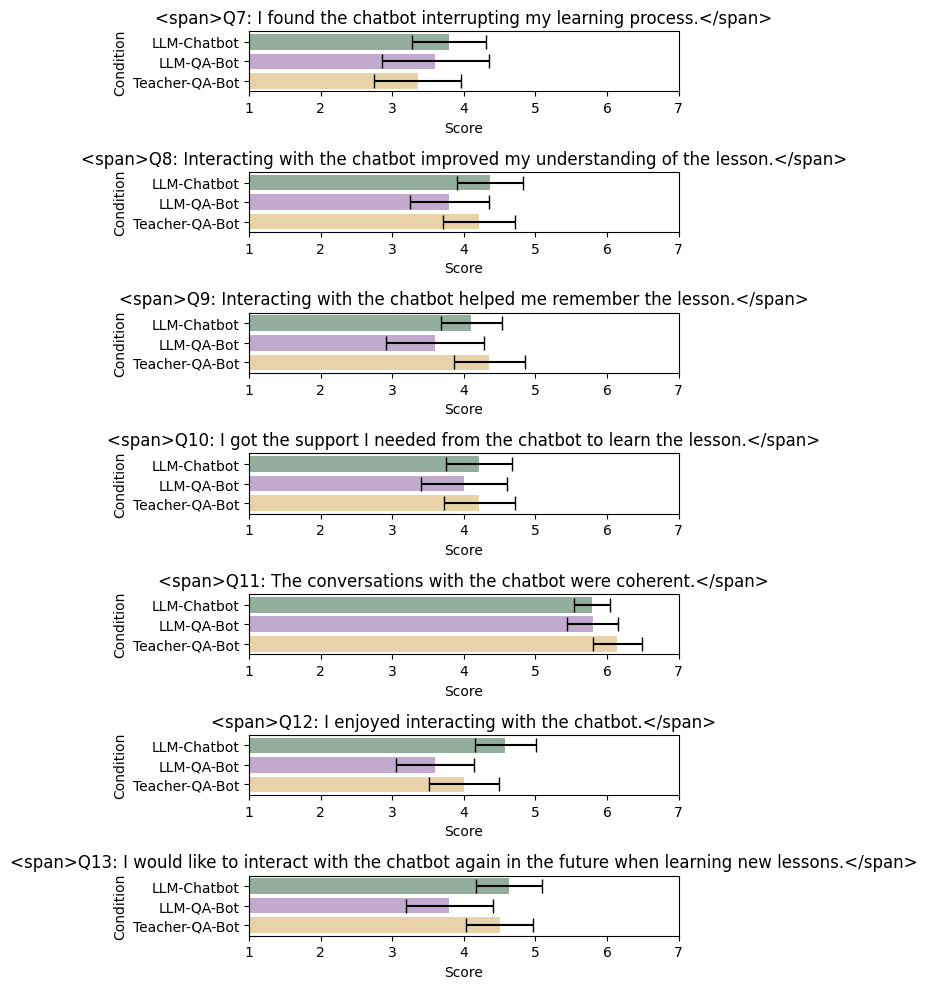

In [24]:
# plot a horizontal bar chart for each question as a subplot and within each subplot, there are 4 bars for 4 conditions, each condion has a mean and std and using a different color
colors = ['#E8D3A9', '#C1AACD', '#94AE9D']
offset = 0
fig, axs = plt.subplots(7, 1, figsize=(6, 10))
for i in range(1, 8):
    if i == 2:
        offset +=1
    # axs[i - 1].set_title("Question " + str(i))
    axs[i - 1].set_title(logs[2]["surveyAnswers"]["q" + str(i+6+offset)]["question"])
    axs[i - 1].set_ylabel("Condition")
    axs[i - 1].set_xlabel("Score")
    axs[i - 1].set_xlim(1, 7)
    axs[i - 1].set_xticks([1, 2, 3, 4, 5, 6, 7])
    axs[i - 1].set_xticklabels(["1", "2", "3", "4", "5", "6", "7"])
    axs[i - 1].set_yticklabels(["Teacher-QA-Bot", "LLM-QA-Bot", "LLM-Chatbot"])
    axs[i - 1].barh(["Teacher-QA-Bot", "LLM-QA-Bot", "LLM-Chatbot"], [np.mean(s) for s in  all_scores[i-1]], xerr=[np.std(s, ddof=1) / np.sqrt(len(s)) for s in all_scores[i-1]], capsize=5, color=colors)
plt.tight_layout()
plt.show()

In [25]:
# print free response questions
for c in ['llm-chatbot', 'llm-qa-bot', 'teacher-qa-bot', "reading"]:
    print(c)
    group = [l for l in logs if l["condition"] == c]
    for i, e in enumerate(group):
        if "answer" in group[i]["surveyAnswers"]["q15"]:
            print(i, group[i]["surveyAnswers"]["q15"]["answer"])
        else:
            print(i)
    print("")


llm-chatbot
0 That was honestly really cool ...that was really cool I think I can really learn that way! I was afraid I was gonna time out if I sat and thought about it some of the answers I think I'm timing out I don't know if I have already... this was awesome and I would love to do this and use that as a tool 
1 thanks for the study
2 The prompts to stay on task were a bit extreme. Sometimes, when moving my mouse to scroll, it would pop up to stay on task. I presume it has to do with detecting the mouse cursor in relation to the window.
3 No.
4 I kept getting a warning message to not search for information on other sites and to stay focused.  this happened randomly when I tried moving my cursor towards the chat box.  It lessened when I change to full screen.  I understand the why, but it was distracting

I apologize for not completing the quiz well.  I forgot just about everything when I selected to start the quiz.  I think I was pressed to finish within allotted time.  I tried just

In [26]:
def time_on_learning(log):
    learning = datetime.strptime(log["timestamps"]["enterMain"], FORMAT)
    knowledge = datetime.strptime(log["timestamps"]["enterKnowledge"], FORMAT)
    return round((knowledge - learning).total_seconds() / 60.0, 1)

print("Time on lesson section")
for c in CONDITIONS:
    group = [l for l in logs if l["condition"] == c]
    print(c, np.median([time_on_learning(l) for l in group]))

Time on lesson section
reading 3.6
teacher-qa-bot 13.05
llm-qa-bot 11.600000000000001
llm-chatbot 18.3


In [27]:
group = [l for l in logs if l["condition"] == 'llm-chatbot']
group_scores = [ux_score(l, 8) for l in group]
mean, err = get_avg_std_err(group_scores)
print(mean, err)

3.4210526315789473 0.4915412535481367


In [28]:
# tab switches
def exam_switches(log):
    switches = 0
    knowledge = datetime.strptime(log["timestamps"]["enterKnowledge"], DATEFORMAT)
    survey = datetime.strptime(log["timestamps"]["enterSurvey"], DATEFORMAT)
    if not "tabSwitches" in log:
        return 0
    for switch in log["tabSwitches"]:
        if switch[0] == "exit":
            time = datetime.strptime(switch[1], DATEFORMAT)
            if (knowledge < time) and (time < survey):
                switches += 1
    return switches

filtered_logs = []
for c in ['llm-chatbot', 'llm-qa-bot', 'teacher-qa-bot', 'reading']:
    print(c)
    group = [l for l in logs if l["condition"] == c]
    for log in group:
        print(exam_switches(log))
        if exam_switches(log) == 0:
            filtered_logs.append(log)
    print("")
# logs = filtered_logs

llm-chatbot


NameError: name 'DATEFORMAT' is not defined

In [ ]:
# conversations switches
def compile_dialog(log):
    messages = []
    for m in log["chatLog"]["current"]["main"]:
        time = datetime.strptime(m["date"], DATEFORMAT)
        messages.append((time, m["text"]))
    for m in log["chatLog"]["current"].get("help", []):
        time = datetime.strptime(m["date"], DATEFORMAT)
        messages.append((time, m["text"]))
    #for m in log["chatLog"]["current"].get("supervisor", []):
    #    time = datetime.strptime(m["date"], DATEFORMAT)
    #    messages.append((time, m.get("text", "Professor: NO LLM RESPONSE")))
    messages.sort()
    for m in messages:
        print(m[1])


for c in ['llm-chatbot']:
    print(c)
    group = [l for l in logs if l["condition"] == c]
    for i, log in enumerate(group):
        print("===========================================================")
        print(i)
        print("===========================================================")
        compile_dialog(log)
        print("")
        print("")

In [ ]:
# tab switches
def time_on_study(log):
    main = datetime.strptime(log["timestamps"]["enterMain"], DATEFORMAT)
    key = datetime.strptime(log["timestamps"]["completion"], DATEFORMAT)
    return key - main

for c in ['llm-chatbot', 'llm-qa-bot', 'teacher-qa-bot', 'reading']:
    print(c)
    group = [l for l in logs if l["condition"] == c]
    for log in group:
        print(time_on_study(log))
    print("")
# logs = filtered_logs

In [ ]:
logs[0]["timestamps"]

In [ ]:
# TODO: check exam tab switches on test pages
# check other statistics that Meng computed befre
# NUMBER OF INTERACTIONS
# TOTAL WORDS WRITTEN
# TIME ON LESSON




### Compile results